In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BitCoin.csv to BitCoin (1).csv


In [ ]:
df = pd.read_csv('BitCoin.csv')


In [ ]:
#Menampilkan tipe data & jumlah nilai kosong
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [ ]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

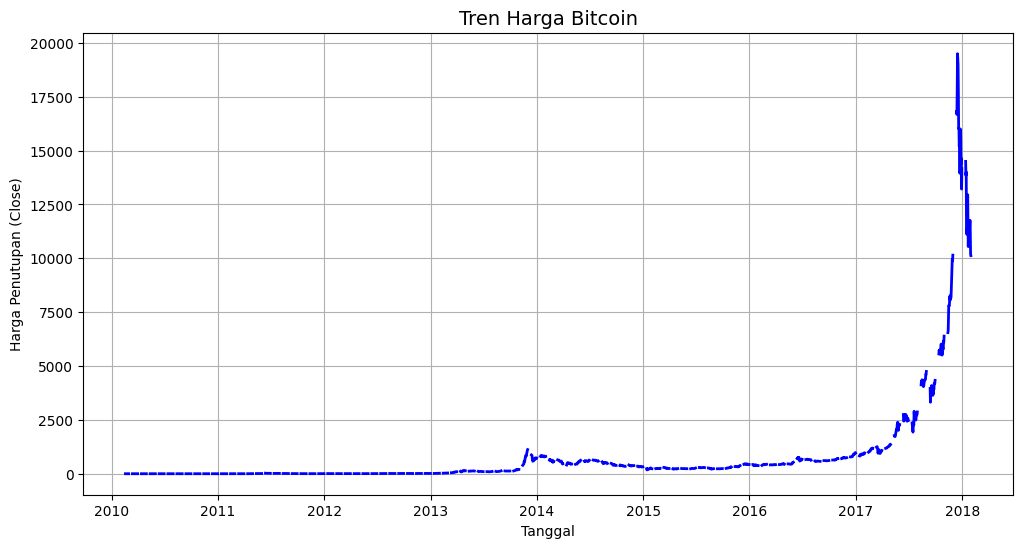

In [ ]:
#Tren Harga Bitcoin
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['btc_market_price'], color='blue', linewidth=2)
plt.title('Tren Harga Bitcoin', fontsize=14)
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Close)')
plt.grid(True)
plt.show()

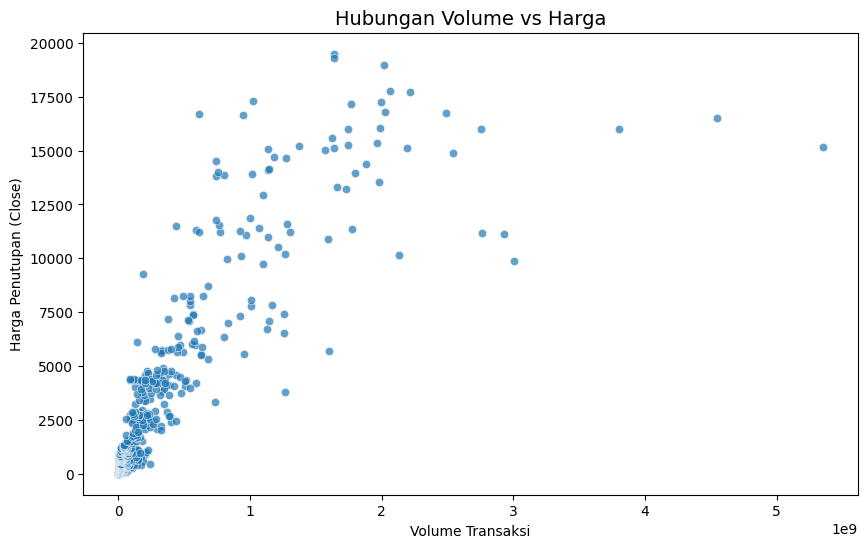

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='btc_trade_volume', y='btc_market_price', data=df, alpha=0.7)
plt.title('Hubungan Volume vs Harga', fontsize=14)
plt.xlabel('Volume Transaksi')
plt.ylabel('Harga Penutupan (Close)')
plt.show()

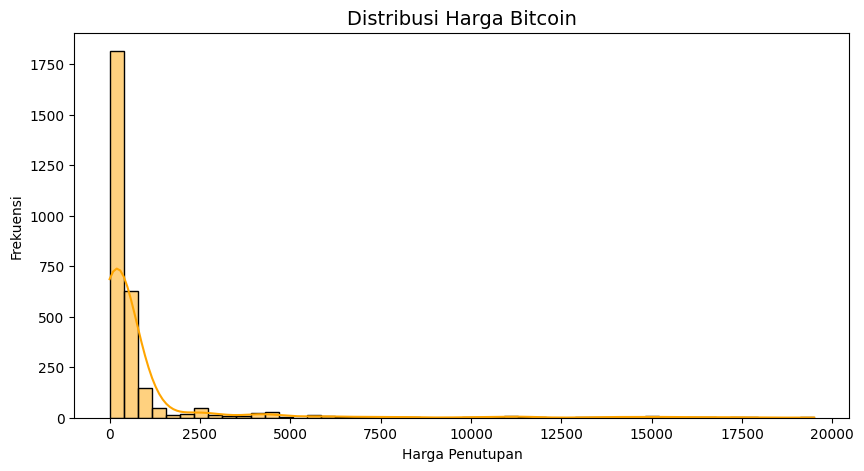

In [ ]:
#Distribusi Harga Bitcoin
plt.figure(figsize=(10,5))
sns.histplot(df['btc_market_price'], bins=50, kde=True, color='orange')
plt.title('Distribusi Harga Bitcoin', fontsize=14)
plt.xlabel('Harga Penutupan')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
print("Jumlah Baris:", df.shape[0])
print("Jumlah Kolom:", df.shape[1])
df.head()

Jumlah Baris: 2906
Jumlah Kolom: 24


,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-17,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2010-02-18,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2010-02-19,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2010-02-20,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2010-02-21,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [ ]:
#Cek Missing Value
print("\n=== CEK MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])



=== CEK MISSING VALUES ===
Date                            1140
btc_total_bitcoins                27
btc_trade_volume                  21
btc_blocks_size                   29
btc_median_confirmation_time      12
btc_difficulty                    16
btc_transaction_fees              10
dtype: int64


In [ ]:
#Handling Missing Value
print("=== HANDLING MISSING VALUES ===")

# Select only numeric columns for imputation
df_num = df.select_dtypes(include=np.number)

df_filled = df_num.fillna(df_num.mean())

print("\nMissing values after imputation:\n", df_filled.isnull().sum())

=== HANDLING MISSING VALUES ===

Missing values after imputation:
 btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions   

In [ ]:
df_filled.info()
df_filled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   btc_market_price                                     2906 non-null   float64
 1   btc_total_bitcoins                                   2906 non-null   float64
 2   btc_market_cap                                       2906 non-null   float64
 3   btc_trade_volume                                     2906 non-null   float64
 4   btc_blocks_size                                      2906 non-null   float64
 5   btc_avg_block_size                                   2906 non-null   float64
 6   btc_n_orphaned_blocks                                2906 non-null   int64  
 7   btc_n_transactions_per_block                         2906 non-null   float64
 8   btc_median_confirmation_time                         2906 non-null  

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [ ]:
#Cek Outliers

print("\n=== CEK OUTLIERS (IQR METHOD) ===")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    if len(outliers) > 0:
        outlier_counts[col] = len(outliers)

print(pd.Series(outlier_counts).sort_values(ascending=False))



=== CEK OUTLIERS (IQR METHOD) ===
btc_n_orphaned_blocks                                  607
btc_cost_per_transaction_percent                       434
btc_difficulty                                         410
btc_cost_per_transaction                               409
btc_hash_rate                                          388
btc_transaction_fees                                   387
btc_trade_volume                                       360
btc_estimated_transaction_volume_usd                   323
btc_market_cap                                         298
btc_market_price                                       274
btc_miners_revenue                                     260
btc_output_volume                                      114
btc_n_transactions_total                                95
btc_median_confirmation_time                            91
btc_estimated_transaction_volume                        63
btc_blocks_size                                         58
btc_n_unique_addresse

In [ ]:
#Handling Outlier
outlier_counts_after = {}

for col in numeric_cols:
    Q1 = df_filled[col].quantile(0.25)
    Q3 = df_filled[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_filled[(df_filled[col] < (Q1 - 1.5 * IQR)) | (df_filled[col] > (Q3 + 1.5 * IQR))]
    if len(outliers) > 0:
        outlier_counts_after[col] = len(outliers)

if len(outlier_counts_after) == 0:
    print("Tidak ada outlier terdeteks")
else:
    print(pd.Series(outlier_counts_after).sort_values(ascending=False))

btc_n_orphaned_blocks                                  607
btc_cost_per_transaction_percent                       434
btc_cost_per_transaction                               409
btc_difficulty                                         397
btc_hash_rate                                          388
btc_transaction_fees                                   384
btc_trade_volume                                       375
btc_estimated_transaction_volume_usd                   323
btc_market_cap                                         298
btc_market_price                                       274
btc_miners_revenue                                     260
btc_output_volume                                      114
btc_median_confirmation_time                            96
btc_n_transactions_total                                95
btc_blocks_size                                         71
btc_estimated_transaction_volume                        63
btc_n_unique_addresses                                  

In [ ]:
numeric_cols = df_filled.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_filled[numeric_cols].corr().abs()

In [ ]:
#Cek Feature Scalling
before_scaling = df_filled[numeric_cols].describe().T[['min', 'max', 'mean', 'std']]
print(before_scaling)

                                                             min  \
btc_market_price                                    0.000000e+00   
btc_total_bitcoins                                  2.043200e+06   
btc_market_cap                                      0.000000e+00   
btc_trade_volume                                    0.000000e+00   
btc_blocks_size                                     0.000000e+00   
btc_avg_block_size                                  2.163350e-04   
btc_n_orphaned_blocks                               0.000000e+00   
btc_n_transactions_per_block                        1.000000e+00   
btc_median_confirmation_time                        0.000000e+00   
btc_hash_rate                                       2.250000e-05   
btc_difficulty                                      2.527738e+00   
btc_miners_revenue                                  0.000000e+00   
btc_transaction_fees                                0.000000e+00   
btc_cost_per_transaction_percent                

In [ ]:
#Feature scaling (Standardization).
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filled[numeric_cols])
df_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)

after_scaling = df_scaled.describe().T[['min', 'max', 'mean', 'std']]
print(after_scaling)

                                                         min        max  \
btc_market_price                                   -0.364104   8.096752   
btc_total_bitcoins                                 -2.265254   1.274316   
btc_market_cap                                     -0.347722   8.110249   
btc_trade_volume                                   -0.253966  18.118030   
btc_blocks_size                                    -0.818233   2.740980   
btc_avg_block_size                                 -0.991623   2.152207   
btc_n_orphaned_blocks                              -0.432334   7.880076   
btc_n_transactions_per_block                       -0.972777   2.974796   
btc_median_confirmation_time                       -1.511282   8.105762   
btc_hash_rate                                      -0.425521   6.965869   
btc_difficulty                                     -0.432486   6.567587   
btc_miners_revenue                                 -0.385318   8.997629   
btc_transaction_fees     

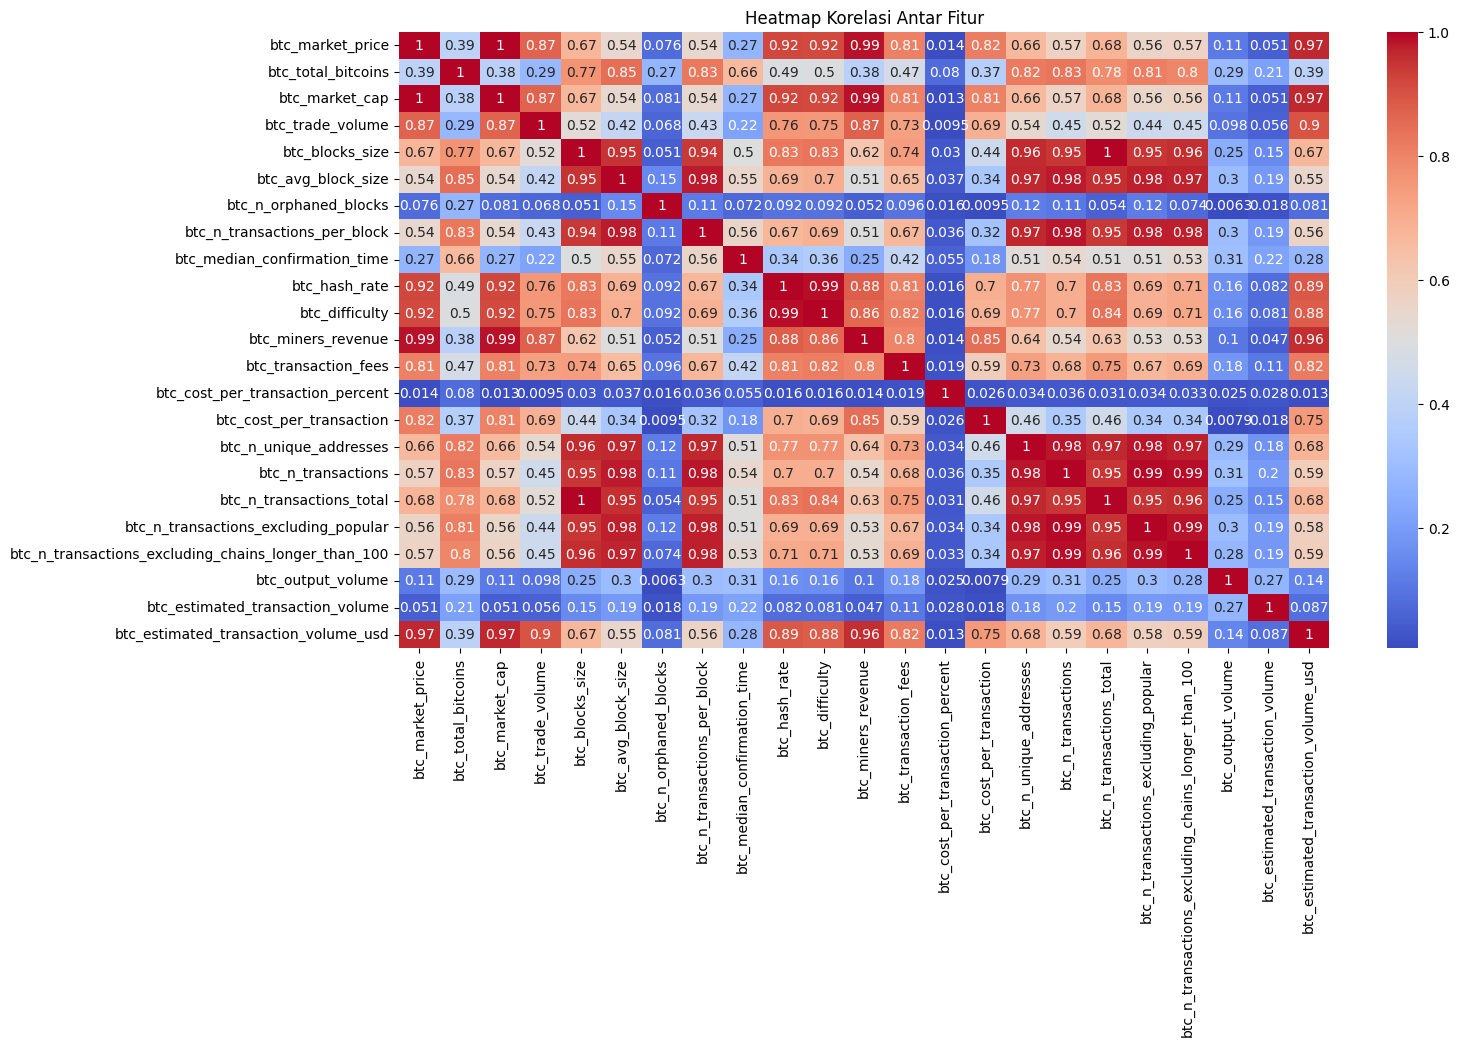

btc_market_price  <-->  btc_market_cap
btc_market_price  <-->  btc_hash_rate
btc_market_price  <-->  btc_difficulty
btc_market_price  <-->  btc_miners_revenue
btc_market_price  <-->  btc_estimated_transaction_volume_usd
btc_market_cap  <-->  btc_hash_rate
btc_market_cap  <-->  btc_difficulty
btc_market_cap  <-->  btc_miners_revenue
btc_market_cap  <-->  btc_estimated_transaction_volume_usd
btc_blocks_size  <-->  btc_avg_block_size
btc_blocks_size  <-->  btc_n_transactions_per_block
btc_blocks_size  <-->  btc_n_unique_addresses
btc_blocks_size  <-->  btc_n_transactions
btc_blocks_size  <-->  btc_n_transactions_total
btc_blocks_size  <-->  btc_n_transactions_excluding_popular
btc_blocks_size  <-->  btc_n_transactions_excluding_chains_longer_than_100
btc_avg_block_size  <-->  btc_n_transactions_per_block
btc_avg_block_size  <-->  btc_n_unique_addresses
btc_avg_block_size  <-->  btc_n_transactions
btc_avg_block_size  <-->  btc_n_transactions_total
btc_avg_block_size  <-->  btc_n_transactio

In [ ]:
#Cek Feature Rediction

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

threshold = 0.9
high_corr = np.where(corr_matrix > threshold)
high_corr_pairs = [
    (corr_matrix.index[x], corr_matrix.columns[y])
    for x, y in zip(*high_corr)
    if x != y and x < y
]
if len(high_corr_pairs) > 0:
    for pair in high_corr_pairs:
        print(f"{pair[0]}  <-->  {pair[1]}")
else:
    print("Tidak ada fitur yang terlalu berkorelasi (redundansi rendah).")


In [ ]:
# Hilangkan satu fitur dari setiap pasangan yang berkorelasi tinggi
features_to_drop = set()
for col1, col2 in high_corr_pairs:
    if col1 not in features_to_drop and col2 not in features_to_drop:
        # Tentukan mana yang akan dihilangkan - untuk lebih sederhana, mari kita hilangkan yang kedua dalam pasangan tersebut
        features_to_drop.add(col2)

df_reduced = df_scaled.drop(columns=list(features_to_drop))

print(f"Original number of features: {df_scaled.shape[1]}")
print(f"Number of features after reduction: {df_reduced.shape[1]}")
display(df_reduced.head())

Original number of features: 23
Number of features after reduction: 11


,btc_market_price,btc_total_bitcoins,btc_trade_volume,btc_blocks_size,btc_n_orphaned_blocks,btc_median_confirmation_time,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_output_volume,btc_estimated_transaction_volume
0,-0.364104,-2.265254,-0.253966,-0.818233,-0.432334,-1.511282,-0.514274,-0.019850,-0.712972,-0.658780,-0.623145
1,-0.364104,-2.262515,-0.253966,-0.818233,-0.432334,-1.511282,-0.514274,0.049794,-0.712972,-0.679084,-0.731585
2,-0.364104,-2.260373,-0.253966,-0.818233,-0.432334,-1.511282,-0.514274,0.687883,-0.712972,-0.683105,-0.756612
3,-0.364104,-2.257718,-0.253966,-0.818233,-0.432334,-1.511282,-0.514274,12.556793,-0.712972,-0.682490,-0.759035
4,-0.364104,-2.255158,-0.253966,-0.818233,-0.432334,-1.511282,-0.514274,0.353335,-0.712972,-0.682000,-0.753432


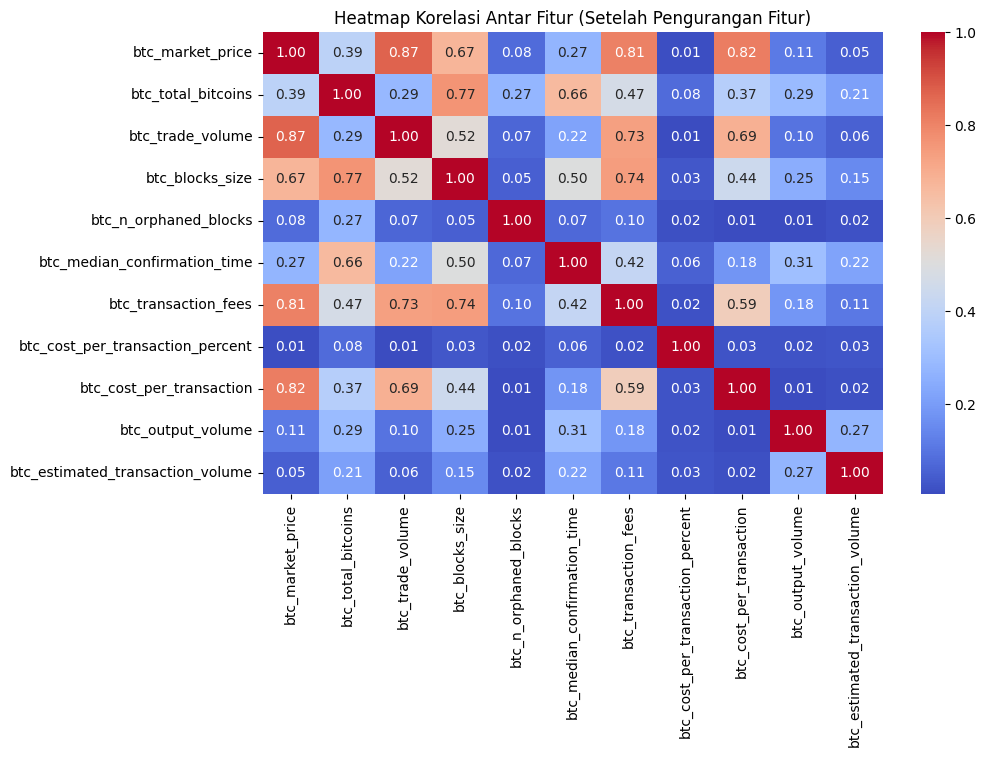

In [ ]:
# Hitung matriks korelasi untuk data yang dikurangi
corr_matrix_reduced = df_reduced.corr().abs()

# Buat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_reduced, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur (Setelah Pengurangan Fitur)")
plt.show()

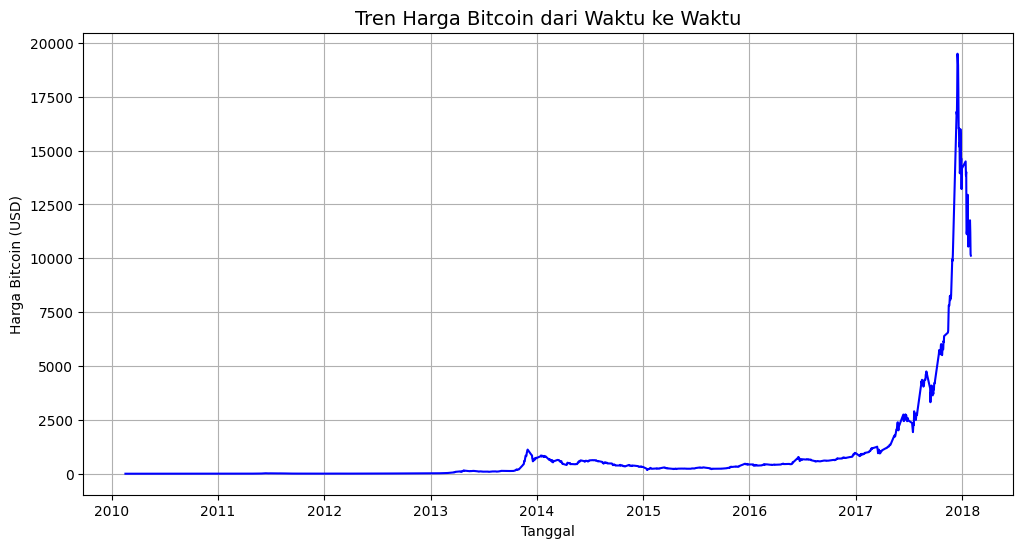

In [ ]:
#Line Plot – Tren Harga Bitcoin dari Waktu ke Waktu

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='btc_market_price', color='blue')
plt.title('Tren Harga Bitcoin dari Waktu ke Waktu', fontsize=14)
plt.xlabel('Tanggal')
plt.ylabel('Harga Bitcoin (USD)')
plt.grid(True)
plt.show()

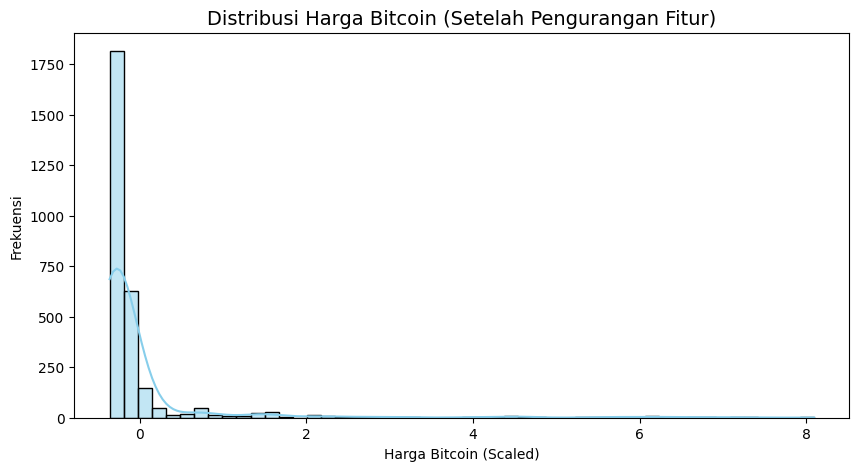

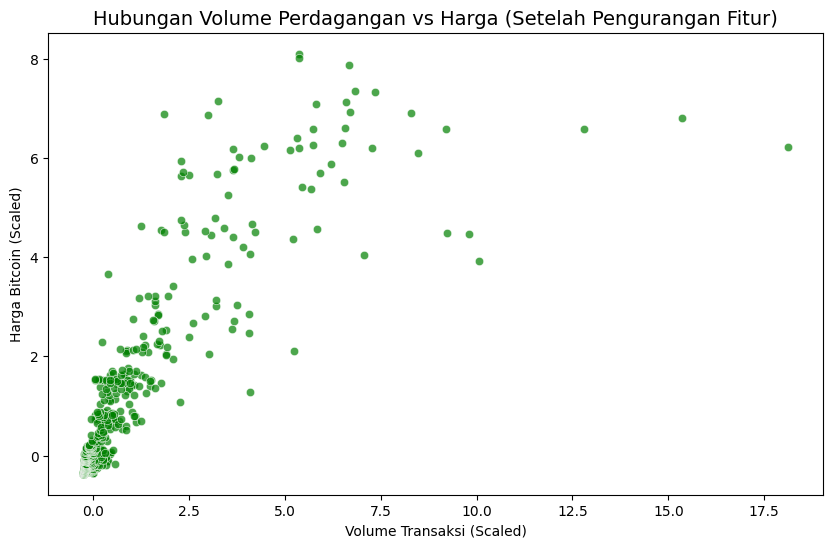

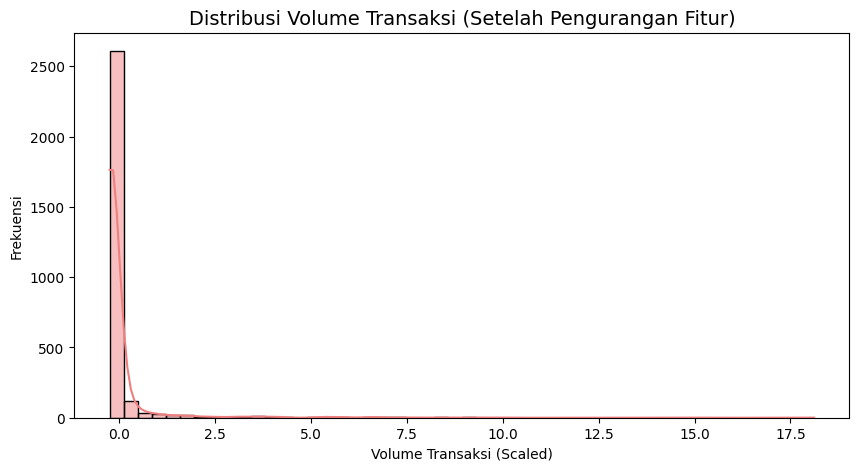

Columns 'btc_hash_rate' or 'btc_difficulty' were dropped during feature reduction.


In [ ]:
# Distribusi Harga Bitcoin Setelah Pengurangan Fitur
plt.figure(figsize=(10, 5))
sns.histplot(df_reduced['btc_market_price'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Harga Bitcoin (Setelah Pengurangan Fitur)', fontsize=14)
plt.xlabel('Harga Bitcoin (Scaled)')
plt.ylabel('Frekuensi')
plt.show()

# Hubungan antara Volume Perdagangan dan Harga Bitcoin Setelah Pengurangan Fitur
plt.figure(figsize=(10, 6))
sns.scatterplot(x='btc_trade_volume', y='btc_market_price', data=df_reduced, alpha=0.7, color='green')
plt.title('Hubungan Volume Perdagangan vs Harga (Setelah Pengurangan Fitur)', fontsize=14)
plt.xlabel('Volume Transaksi (Scaled)')
plt.ylabel('Harga Bitcoin (Scaled)')
plt.show()

# Distribusi Volume Transaksi Setelah Pengurangan Fitur
plt.figure(figsize=(10, 5))
sns.histplot(df_reduced['btc_trade_volume'], bins=50, kde=True, color='lightcoral')
plt.title('Distribusi Volume Transaksi (Setelah Pengurangan Fitur)', fontsize=14)
plt.xlabel('Volume Transaksi (Scaled)')
plt.ylabel('Frekuensi')
plt.show()

# Hubungan antara Hash Rate dan Kesulitan (Difficulty) Setelah Pengurangan Fitur
# Check if 'btc_hash_rate' and 'btc_difficulty' are still in the reduced dataframe
if 'btc_hash_rate' in df_reduced.columns and 'btc_difficulty' in df_reduced.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='btc_hash_rate', y='btc_difficulty', data=df_reduced, alpha=0.7, color='purple')
    plt.title('Hubungan Hash Rate vs Difficulty (Setelah Pengurangan Fitur)', fontsize=14)
    plt.xlabel('Hash Rate (Scaled)')
    plt.ylabel('Difficulty (Scaled)')
    plt.show()
else:
    print("Columns 'btc_hash_rate' or 'btc_difficulty' were dropped during feature reduction.")

In [ ]:
df_stat = df_reduced.copy()


In [ ]:
df_stat = df_stat.select_dtypes(include=['float64', 'int64']).dropna()

x = df_stat['btc_market_price']
y = df_stat['btc_trade_volume']

In [ ]:
import math
from scipy import stats


# UJI PARAMETRIK: Pearson Correlation

pearson_corr, pearson_p = stats.pearsonr(x, y)

effect_size_pearson = abs(pearson_corr)

# Hitung Confidence Interval untuk korelasi (95%)
# Fisher transformation
def fisher_ci(r, n, alpha=0.05):
    z = np.arctanh(r)
    se = 1 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf(1 - alpha/2)
    lo_z, hi_z = z - z_crit * se, z + z_crit * se
    lo, hi = np.tanh((lo_z, hi_z))
    return lo, hi

ci_low, ci_high = fisher_ci(pearson_corr, len(df_stat))

print("=== PARAMETRIC TEST: Pearson Correlation ===")
print(f"Variabel: btc_market_price vs btc_trade_volume")
print(f"Koefisien Korelasi (r) = {pearson_corr:.4f}")
print(f"p-value = {pearson_p:.4e}")
print(f"Effect size (|r|) = {effect_size_pearson:.3f}")
print(f"95% Confidence Interval = [{ci_low:.3f}, {ci_high:.3f}]")

# Interpretasi sederhana
if pearson_p < 0.05:
    print("Interpretasi: Terdapat hubungan linear yang signifikan secara statistik antara kedua variabel (p < 0.05).")
else:
    print("Interpretasi: Tidak terdapat hubungan linear yang signifikan antara kedua variabel (p ≥ 0.05).")


#UJI NON-PARAMETRIK: Spearman Correlation

spearman_corr, spearman_p = stats.spearmanr(x, y)

print("\n=== NON-PARAMETRIC TEST: Spearman Correlation ===")
print(f"Variabel: btc_market_price vs btc_trade_volume")
print(f"Koefisien Korelasi (ρ) = {spearman_corr:.4f}")
print(f"p-value = {spearman_p:.4e}")
print(f"Effect size (|ρ|) = {abs(spearman_corr):.3f}")

if spearman_p < 0.05:
    print("Interpretasi: Terdapat hubungan monoton signifikan antara kedua variabel (p < 0.05).")
else:
    print("Interpretasi: Tidak terdapat hubungan monoton signifikan antara kedua variabel (p ≥ 0.05).")

=== PARAMETRIC TEST: Pearson Correlation ===
Variabel: btc_market_price vs btc_trade_volume
Koefisien Korelasi (r) = 0.8686
p-value = 0.0000e+00
Effect size (|r|) = 0.869
95% Confidence Interval = [0.859, 0.877]
Interpretasi: Terdapat hubungan linear yang signifikan secara statistik antara kedua variabel (p < 0.05).

=== NON-PARAMETRIC TEST: Spearman Correlation ===
Variabel: btc_market_price vs btc_trade_volume
Koefisien Korelasi (ρ) = 0.9224
p-value = 0.0000e+00
Effect size (|ρ|) = 0.922
Interpretasi: Terdapat hubungan monoton signifikan antara kedua variabel (p < 0.05).


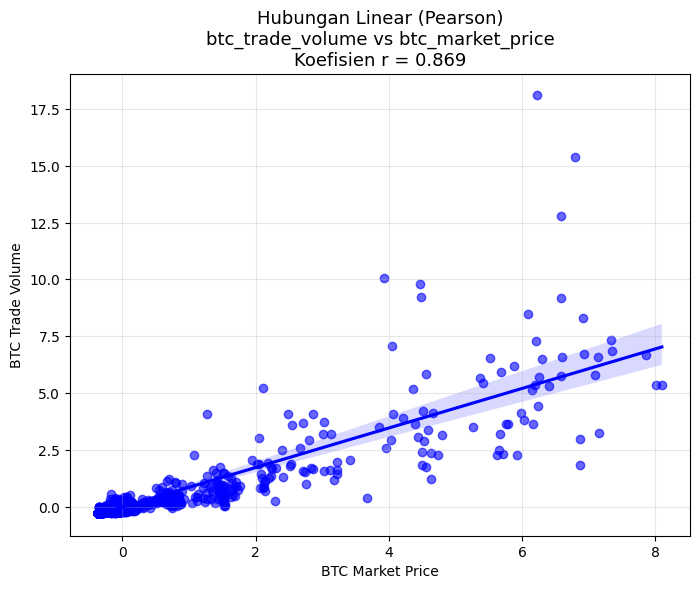

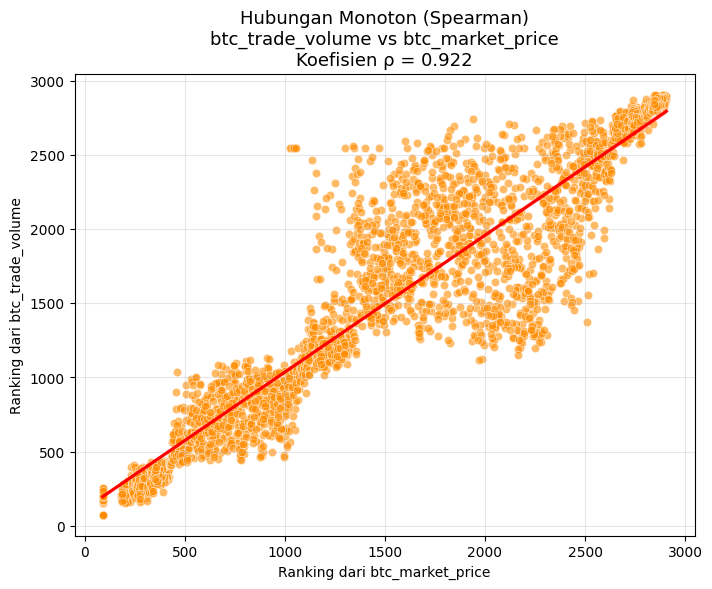

In [ ]:
# Pilih dua variabel utama yang diuji
x_var = 'btc_market_price'
y_var = 'btc_trade_volume'

# Buat DataFrame dari dua kolom
data_plot = df_reduced[[x_var, y_var]].dropna()

# Hitung korelasi Pearson & Spearman
pearson_corr, _ = stats.pearsonr(data_plot[x_var], data_plot[y_var])
spearman_corr, _ = stats.spearmanr(data_plot[x_var], data_plot[y_var])

# Scatter Plot dengan Regresi Linear (untuk Pearson)
plt.figure(figsize=(8,6))
sns.regplot(data=data_plot, x=x_var, y=y_var, color='blue', scatter_kws={'alpha':0.6})
plt.title(f"Hubungan Linear (Pearson)\n{y_var} vs {x_var}\nKoefisien r = {pearson_corr:.3f}", fontsize=13)
plt.xlabel("BTC Market Price")
plt.ylabel("BTC Trade Volume")
plt.grid(True, alpha=0.3)
plt.show()

# Scatter Plot Rank (untuk Spearman)
# Ubah data jadi ranking (untuk visualisasi Spearman)
rank_x = data_plot[x_var].rank()
rank_y = data_plot[y_var].rank()

plt.figure(figsize=(8,6))
sns.scatterplot(x=rank_x, y=rank_y, alpha=0.6, color='darkorange')
sns.regplot(x=rank_x, y=rank_y, scatter=False, color='red')
plt.title(f"Hubungan Monoton (Spearman)\n{y_var} vs {x_var}\nKoefisien ρ = {spearman_corr:.3f}", fontsize=13)
plt.xlabel(f"Ranking dari {x_var}")
plt.ylabel(f"Ranking dari {y_var}")
plt.grid(True, alpha=0.3)
plt.show()
